In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import colorsys

from scripts import *
from harmonies import *
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

plt.rcParams['figure.figsize'] = 20, 5

# Paleta de Analisis

In [3]:
hue_steps = 12
hue_range = 360
hue_step_size = int(360/hue_steps)

hues = np.array([(hue_step/hue_range) for hue_step in range(0, hue_range, hue_step_size)])

In [388]:
cube_palette, pd_cube, final_analysis_array, final_analysis_palette, final_analysis_names, inverse_map = get_hue_palette_cube(sorted(np_itten_color_wheel[:,0])[::-1])
#cube_palette, pd_cube, final_analysis_array, final_analysis_palette, final_analysis_names, inverse_map = get_hue_palette_cube(sorted(hues)[::-1])

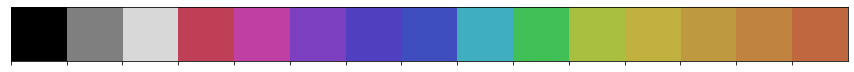

In [389]:
sns.palplot(get_palette(final_analysis_palette))

# Carga archivos

In [390]:
cam = glob.glob('../../../../photos/new_yorker/*.png')

In [391]:
signatures = get_image_signatures(cam, analysis_palette=cube_palette)

100%|██████████| 236/236 [00:10<00:00, 22.28it/s]


In [392]:
pd_signatures = pd.DataFrame(signatures).fillna(0)

In [393]:
for name, indices, _ in final_analysis_array:
    pd_signatures[name] = pd_signatures.loc[:, pd_signatures.columns.isin(indices)].sum(axis=1)

In [394]:
pd_discretized_signature = pd_signatures[final_analysis_names[3:]]
pd_discretized_total_signature = pd_signatures[final_analysis_names]

In [395]:
pd_discr_weighted_signatures = pd_discretized_signature.apply(lambda x: x/x.sum(), axis=1).fillna(0)
pd_discr_weighted_total_signatures = pd_discretized_total_signature.apply(lambda x: x/x.sum(), axis=1)

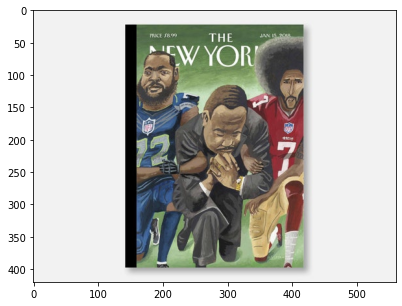

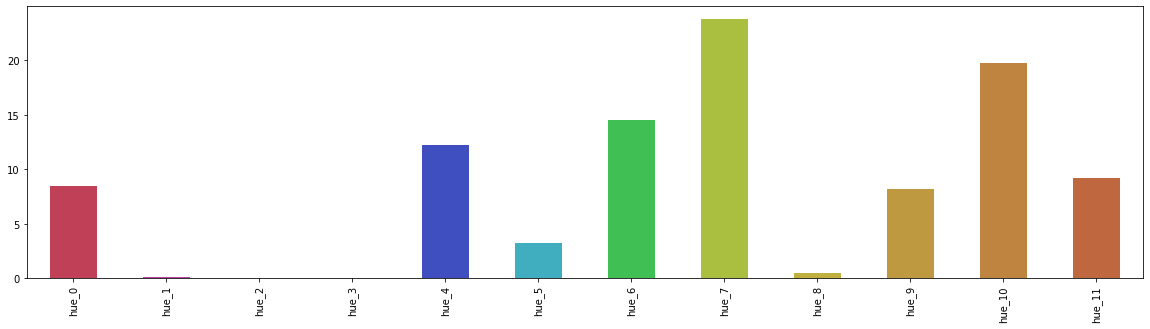

hue_0      8.500825
hue_1      0.079828
hue_2      0.024835
hue_3      0.021288
hue_4     12.259850
hue_5      3.203775
hue_6     14.502138
hue_7     23.756896
hue_8      0.473648
hue_9      8.213443
hue_10    19.753065
hue_11     9.210410
Name: 47, dtype: float64


In [396]:
img_idx = 47

plt.imshow(get_img(cam[img_idx])[0])
plt.show()

(pd_discr_weighted_signatures.iloc[img_idx]*100).plot.bar(color=get_palette(final_analysis_palette[3:]))
plt.show()
print((pd_discr_weighted_signatures.iloc[img_idx]*100))

<AxesSubplot:>

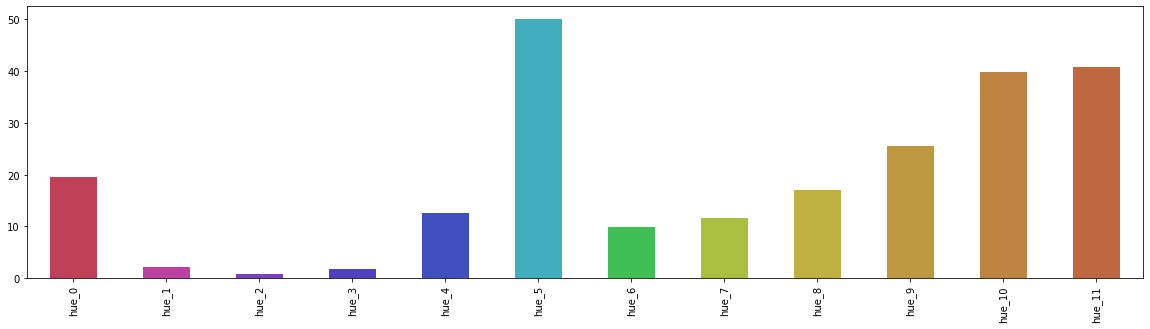

In [397]:
pd_discr_weighted_signatures.sum().plot.bar(color=get_palette(final_analysis_palette[3:]))

<AxesSubplot:>

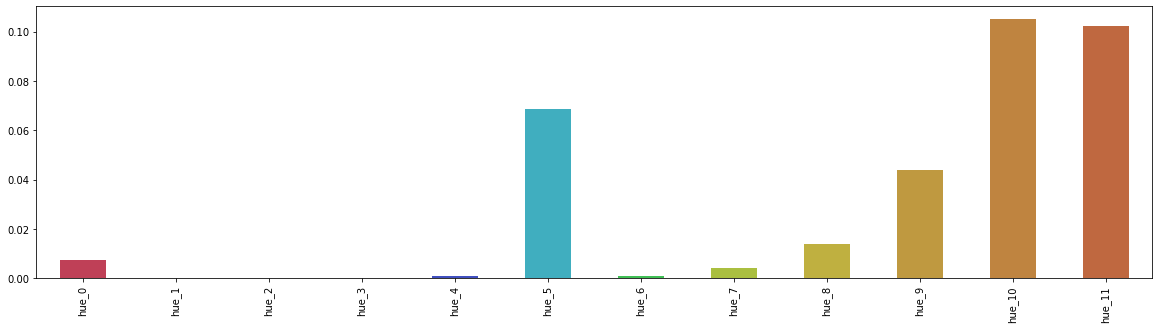

In [398]:
pd_discr_weighted_signatures.median().plot.bar(color=get_palette(final_analysis_palette[3:]))

In [399]:
pd_weighted_signatures = pd_signatures.apply(lambda x: x/x.sum(), axis=1)

# Otros

In [515]:
check_relaciones = pd_discr_weighted_signatures.copy()

umbral = 0.01

check_relaciones['monochromatic'] = (1*(pd_discr_weighted_signatures > umbral)).apply(monochromatic, axis=1)
check_relaciones['analogous'] = (1*(pd_discr_weighted_signatures > umbral)).apply(analogous, axis=1)
check_relaciones['complementary'] = (1*(pd_discr_weighted_signatures > umbral)).apply(complementary, axis=1)
check_relaciones['splitComplementary'] = (1*(pd_discr_weighted_signatures > umbral)).apply(splitComplementary, axis=1)
check_relaciones['triad'] = (1*(pd_discr_weighted_signatures > umbral)).apply(triad, axis=1)
check_relaciones['square'] = (1*(pd_discr_weighted_signatures > umbral)).apply(square, axis=1)
check_relaciones['rectangular'] = (1*(pd_discr_weighted_signatures > umbral)).apply(rectangular, axis=1)

<AxesSubplot:>

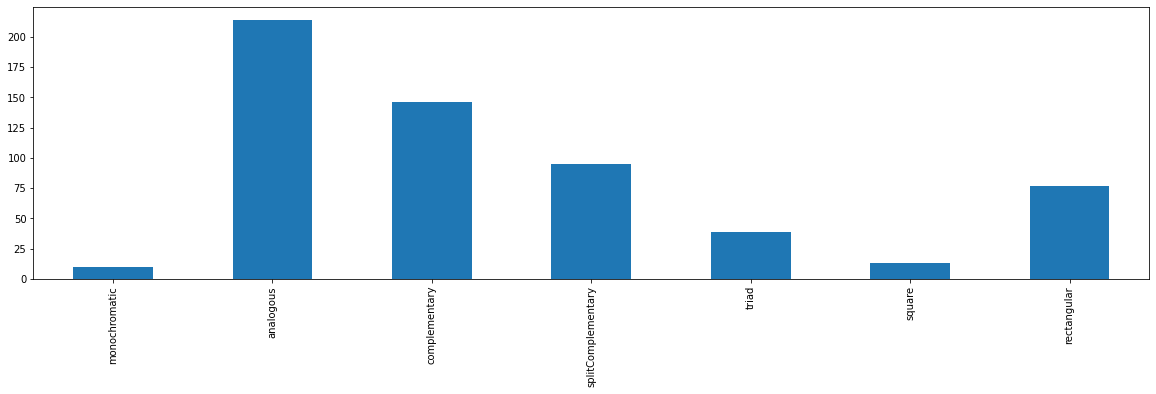

In [516]:
check_relaciones[['monochromatic','analogous','complementary','splitComplementary','triad','square','rectangular']].sum().plot.bar()

# Revisión temporal

In [402]:
pd_discr_weighted_signatures['glob'] = cam
pd_discr_weighted_signatures['glob'] = pd.to_datetime(pd_discr_weighted_signatures['glob'].str.split('/').apply(lambda x: x[-1].split(' ')[0]))
pd_discr_weighted_signatures = pd_discr_weighted_signatures.set_index('glob')

In [403]:
pd_discr_weighted_signatures_prev_202003 = pd_discr_weighted_signatures[(pd_discr_weighted_signatures.index < pd.to_datetime('2020-03-01'))]
pd_discr_weighted_signatures_post_202003 = pd_discr_weighted_signatures[(pd_discr_weighted_signatures.index < pd.to_datetime('2021-03-01')) & (pd_discr_weighted_signatures.index > pd.to_datetime('2020-03-01'))]

In [404]:
check_relaciones_prev_202003 = pd_discr_weighted_signatures_prev_202003.copy()

check_relaciones_prev_202003['monochromatic'] = (1*(pd_discr_weighted_signatures_prev_202003 > 0.05)).apply(monochromatic, axis=1)
check_relaciones_prev_202003['analogous'] = (1*(pd_discr_weighted_signatures_prev_202003 > 0.05)).apply(analogous, axis=1)
check_relaciones_prev_202003['complementary'] = (1*(pd_discr_weighted_signatures_prev_202003 > 0.05)).apply(complementary, axis=1)
check_relaciones_prev_202003['splitComplementary'] = (1*(pd_discr_weighted_signatures_prev_202003 > 0.05)).apply(splitComplementary, axis=1)
check_relaciones_prev_202003['triad'] = (1*(pd_discr_weighted_signatures_prev_202003 > 0.05)).apply(triad, axis=1)
check_relaciones_prev_202003['square'] = (1*(pd_discr_weighted_signatures_prev_202003 > 0.05)).apply(square, axis=1)
check_relaciones_prev_202003['rectangular'] = (1*(pd_discr_weighted_signatures_prev_202003 > 0.05)).apply(rectangular, axis=1)
check_relaciones_prev_202003['target'] = 0

check_relaciones_prev_202003 = check_relaciones_prev_202003[['monochromatic','analogous','complementary','splitComplementary','triad','square','rectangular','target']]

check_relaciones_prev_post_202003 = pd_discr_weighted_signatures_post_202003.copy()

check_relaciones_prev_post_202003['monochromatic'] = (1*(pd_discr_weighted_signatures_post_202003 > 0.05)).apply(monochromatic, axis=1)
check_relaciones_prev_post_202003['analogous'] = (1*(pd_discr_weighted_signatures_post_202003 > 0.05)).apply(analogous, axis=1)
check_relaciones_prev_post_202003['complementary'] = (1*(pd_discr_weighted_signatures_post_202003 > 0.05)).apply(complementary, axis=1)
check_relaciones_prev_post_202003['splitComplementary'] = (1*(pd_discr_weighted_signatures_post_202003 > 0.05)).apply(splitComplementary, axis=1)
check_relaciones_prev_post_202003['triad'] = (1*(pd_discr_weighted_signatures_post_202003 > 0.05)).apply(triad, axis=1)
check_relaciones_prev_post_202003['square'] = (1*(pd_discr_weighted_signatures_post_202003 > 0.05)).apply(square, axis=1)
check_relaciones_prev_post_202003['rectangular'] = (1*(pd_discr_weighted_signatures_post_202003 > 0.05)).apply(rectangular, axis=1)
check_relaciones_prev_post_202003['target'] = 1

check_relaciones_prev_post_202003 = check_relaciones_prev_post_202003[['monochromatic','analogous','complementary','splitComplementary','triad','square','rectangular','target']]

<AxesSubplot:>

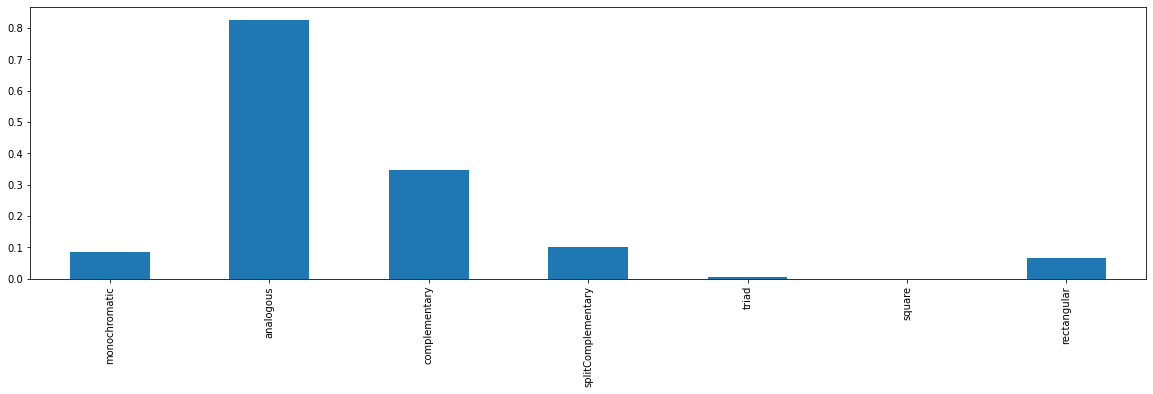

In [405]:
check_relaciones_prev_202003[['monochromatic','analogous','complementary','splitComplementary','triad','square','rectangular']].mean().plot.bar()

<AxesSubplot:>

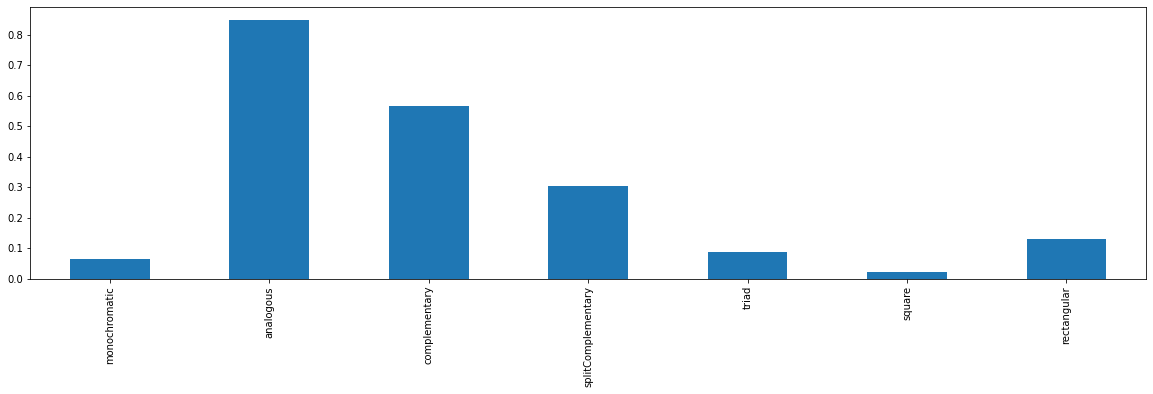

In [406]:
check_relaciones_prev_post_202003[['monochromatic','analogous','complementary','splitComplementary','triad','square','rectangular']].mean().plot.bar()

In [407]:
len(pd_discr_weighted_signatures_prev_202003)

178

<AxesSubplot:>

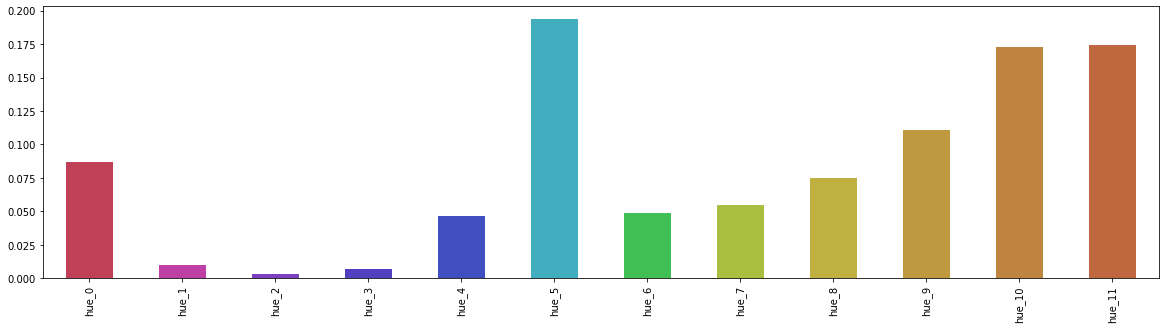

In [514]:
pd_discr_weighted_signatures_prev_202003[ex_hues].mean().plot.bar(color=get_palette(final_analysis_palette[3:]))


<AxesSubplot:>

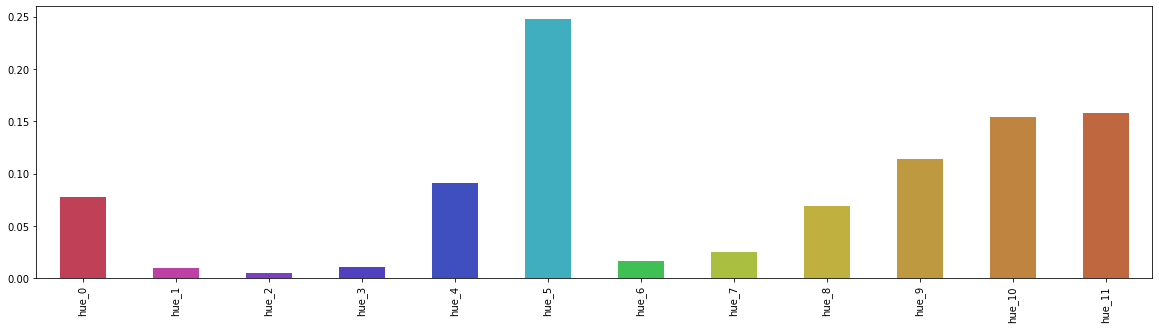

In [409]:
pd_discr_weighted_signatures_post_202003[ex_hues].mean().plot.bar(color=get_palette(final_analysis_palette[3:]))

<AxesSubplot:>

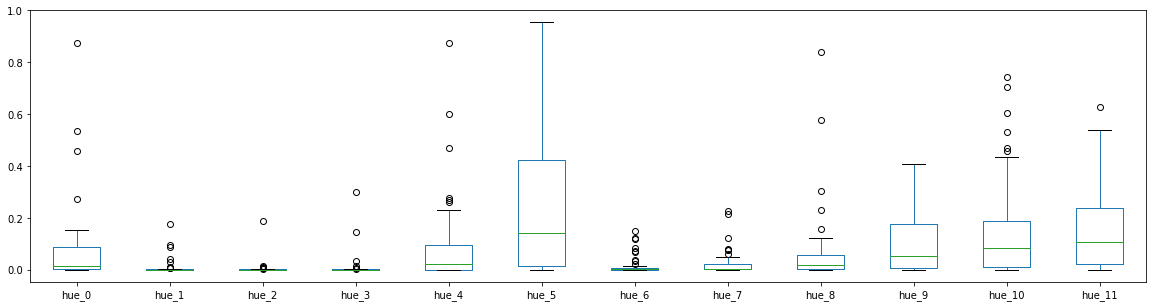

In [410]:
pd_discr_weighted_signatures_post_202003.plot.box()

<AxesSubplot:>

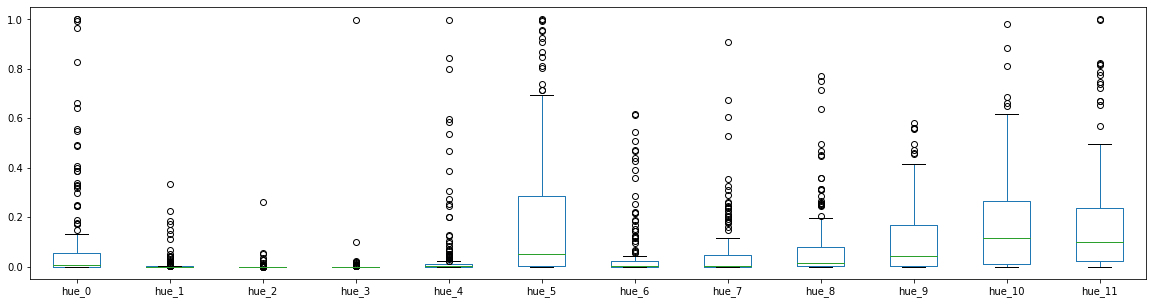

In [411]:
pd_discr_weighted_signatures_prev_202003.plot.box()

<AxesSubplot:>

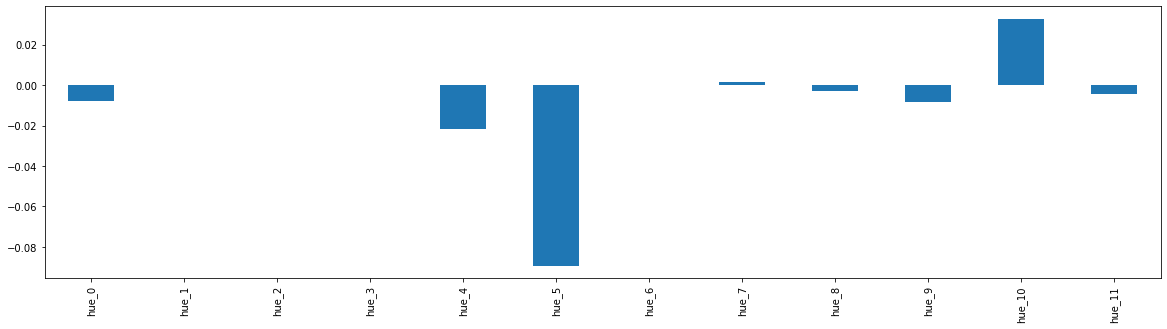

In [412]:
((pd_discr_weighted_signatures_prev_202003[ex_hues].median() - pd_discr_weighted_signatures_post_202003[ex_hues].median())).plot.bar()

In [413]:
pd_discr_weighted_signatures_prev_202003['target'] = 0
pd_discr_weighted_signatures_post_202003['target'] = 1

<ipython-input-413-481afc00b618>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_discr_weighted_signatures_prev_202003['target'] = 0
<ipython-input-413-481afc00b618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_discr_weighted_signatures_post_202003['target'] = 1


In [414]:
dataset = pd.concat([pd_discr_weighted_signatures_prev_202003, pd_discr_weighted_signatures_post_202003])
dataset_harmony = pd.concat([check_relaciones_prev_202003, check_relaciones_prev_post_202003])

In [415]:
import statsmodels.formula.api as smf

In [416]:
dataset['target'].describe()

count    224.000000
mean       0.205357
std        0.404867
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: target, dtype: float64

In [503]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, MinMaxScaler, Normalizer, MaxAbsScaler

ex_hues = [col for col in dataset_s.columns if col not in ['target']]
dataset_s = dataset.copy()

dataset_s[ex_hues] = PowerTransformer(method='box-cox').fit_transform(dataset_s[ex_hues] + 0.001) 

In [504]:
model_harmony = smf.logit("target ~ monochromatic + analogous + complementary + splitComplementary + triad + rectangular", dataset_harmony*1)

summary_harmony = model_harmony.fit(maxiter=5000)

summary_harmony.summary()

Optimization terminated successfully.
         Current function value: 0.469999
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  224
Model:                          Logit   Df Residuals:                      217
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 May 2021   Pseudo R-squ.:                 0.07433
Time:                        23:42:17   Log-Likelihood:                -105.28
converged:                       True   LL-Null:                       -113.73
Covariance Type:            nonrobust   LLR p-value:                  0.009627
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.6151      0.602     -2.683      0.007      -2.795      -0.435
monochromatic          0.0056      0.873      0.006      0.995      -1.706       1.717
analogous             -0.2004      0.607     -0.330      0.741      -1.389       0.988
complementary          0.4716      0.417      1.132      0.258      -0.345       1.288
splitComplementary     1.1428      0.574      1.991      0.047       0.018       2.268
triad                  2.1082      1.177      1.792      0.073      -0.198       4.414
rectangular           -0.5933      0.701     -0.847      0.397      -1.966       0.780
======================================================================================
"""

In [505]:
dataset.melt(id_vars='target')

,target,variable,value
0,0,hue_0,0.011320
1,0,hue_0,0.018152
2,0,hue_0,0.001661
3,0,hue_0,0.033584
4,0,hue_0,0.011556
...,...,...,...
2683,1,hue_11,0.323305
2684,1,hue_11,0.023948
2685,1,hue_11,0.243372
2686,1,hue_11,0.000000


<AxesSubplot:xlabel='value', ylabel='variable'>

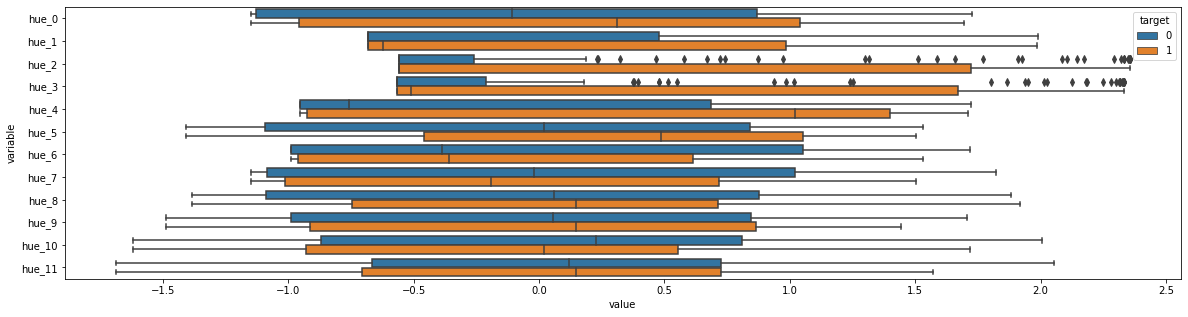

In [508]:
sns.boxplot(y='variable', x='value', hue='target', data=dataset_s.melt(id_vars='target'))

/home/goviedb/python_venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'hue_0'}>,
        <AxesSubplot:title={'center':'hue_1'}>,
        <AxesSubplot:title={'center':'hue_2'}>,
        <AxesSubplot:title={'center':'hue_3'}>],
       [<AxesSubplot:title={'center':'hue_4'}>,
        <AxesSubplot:title={'center':'hue_5'}>,
        <AxesSubplot:title={'center':'hue_6'}>,
        <AxesSubplot:title={'center':'hue_7'}>],
       [<AxesSubplot:title={'center':'hue_8'}>,
        <AxesSubplot:title={'center':'hue_9'}>,
        <AxesSubplot:title={'center':'hue_10'}>,
        <AxesSubplot:title={'center':'hue_11'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

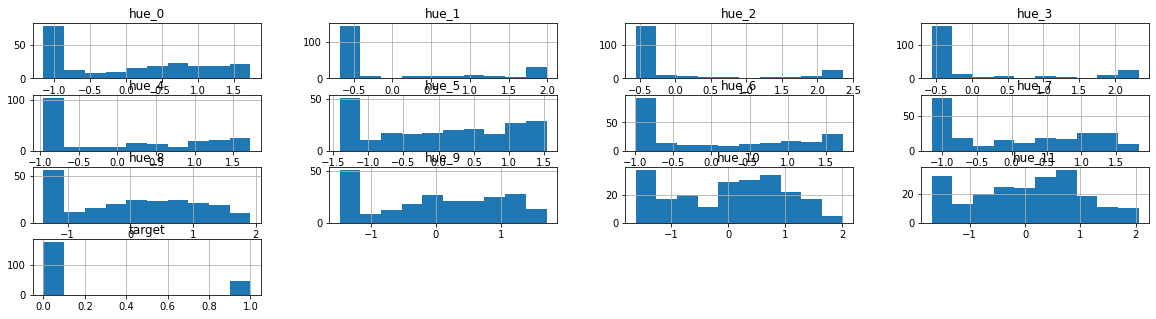

In [510]:
dataset_s.hist()

In [507]:
model_2 = smf.logit("target ~ hue_0 + hue_1 + hue_2 + hue_3 + hue_4 + hue_5 + hue_6 + hue_7 + hue_8 + hue_9 + hue_10 + hue_11 ", dataset_s)

summary_2 = model_2.fit(maxiter=500)

summary_2.summary()

Optimization terminated successfully.
         Current function value: 0.465370
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  224
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                           12
Date:                Sun, 30 May 2021   Pseudo R-squ.:                 0.08345
Time:                        23:42:18   Log-Likelihood:                -104.24
converged:                       True   LL-Null:                       -113.73
Covariance Type:            nonrobust   LLR p-value:                   0.08897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5050      0.187     -8.052      0.000      -1.871      -1.139
hue_0          0.1188      0.229      0.519      0.603      -0.330       0.567
hue_1         -0.3355      0.356     -0.941      0.347      -1.034       0.363
hue_2          0.4011      0.477      0.842      0.400      -0.533       1.335
hue_3         -0.0197      0.403     -0.049      0.961      -0.810       0.771
hue_4          0.4836      0.221      2.186      0.029       0.050       0.917
hue_5          0.2049      0.208      0.986      0.324      -0.202       0.612
hue_6         -0.1541      0.285     -0.541      0.588      -0.712       0.404
hue_7         -0.0789      0.317     -0.249      0.804      -0.701       0.543
hue_8         -0.0668      0.348     -0.192      0.848      -0.750       0.616
hue_9          0.3863      0.367      1.051      0.293      -0.334       1.106
hue_10        -0.3061      0.282     -1.085      0.278      -0.859       0.247
hue_11         0.0912      0.213      0.429      0.668      -0.326       0.508
==============================================================================
"""